In [ ]:
# Importing the Google Drive in Colab

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# Importing the Libraries

import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt

In [ ]:
# Loading the data (Reference:- https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)

data_text = np.loadtxt('/content/drive/MyDrive/hw3Data/D2z.txt')

In [ ]:
# We need to have the data in the numpy array so to extract the feature and target column from the text file.

type(data_text)

numpy.ndarray

In [ ]:
# Extracting the dependent and independent columns from the array.

X_train = data_text[:, :-1]
y_train = data_text[:, -1]

In [ ]:
# Using the range given in the question for making the 2D grid.

range_of_x = np.arange(-2, 2, 0.1)
range_of_y = np.arange(-2, 2, 0.1)

In [ ]:
# Creating the meshgrid for the 2D grid.

xx_grid, yy_grid = np.meshgrid(range_of_x, range_of_y)

In [ ]:
# Flattening the meshgrid to get test points.

points_of_test = np.column_stack((xx_grid.ravel(), yy_grid.ravel()))

In [ ]:
# Using an array to store predictions.

prediction_array = []

In [ ]:
# Implementing the 1-Nearest Neighbor with the help of Euclidean distance.

# Reference taken from (https://saturncloud.io/blog/how-to-perform-nd-distance-and-nearest-neighbor-calculations-on-numpy-arrays/)

for point in points_of_test:
    euclidean_distances = np.linalg.norm(X_train - point, axis=1)
    index_of_nearest_neighbor = np.argmin(euclidean_distances)
    prediction = y_train[index_of_nearest_neighbor]
    prediction_array.append(prediction)

In [ ]:
# Reshaping the predictions for matching the shape of the grid

predictions_reshape = np.array(prediction_array).reshape(xx_grid.shape)

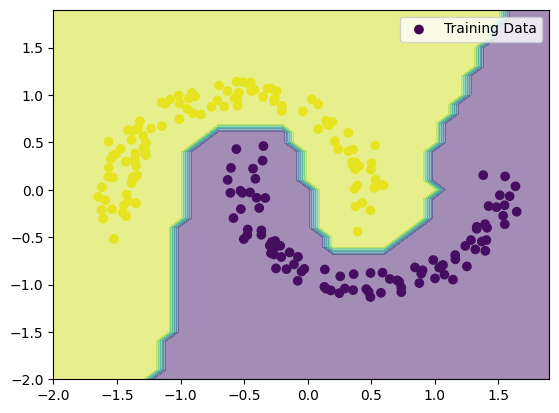

In [ ]:
# Creating a scatter plot for training data

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, label='Training Data')

# Creating a contour plot for the predictions on Grid

plt.contourf(xx_grid, yy_grid, predictions_reshape, alpha=0.5)

# Adding the legend

plt.legend()

# Show the plot

plt.show()
